# Flood Prediction (The City of Lagos)

## Introduction

![Flood](https://leadership.ng/wp-content/uploads/2022/07/FLOOD-PIX.jpg)

Flooding is a recurrent and significant challenge in Lagos, Nigeria's largest city, causing widespread damage to infrastructure, disrupting daily life, and posing severe risks to public health and safety. Understanding and predicting flood events are crucial for effective disaster preparedness and mitigation. This case study aims to forecast the likely date of the next flood in Lagos. By analyzing historical weather patterns, precipitation levels, tidal data, and other relevant factors, we seek to develop a predictive model that can provide timely warnings and help in planning preventative measures. This study not only highlights the importance of data-driven approaches in addressing environmental challenges but also aims to contribute to the resilience and sustainability of urban environments prone to flooding.

*Data Source:* https://shorturl.at/qB54F

*Documentation:* https://shorturl.at/8mP3z

## Methodology

In this case study, data-driven approach was employed to predict the next potential flood date in Lagos. the first step was collecting extensive historical data on weather patterns. This data was then cleaned and preprocessed to ensure accuracy and consistency. Further analysis was conducted to identify patterns and correlations between rainfall intensity, and duration. A predictive model was developed using logistic regression, incorporating key variables such as average precipitation per hour and total rainfall duration. The model was trained and validated to ensure its reliability in forecasting flood events. Finally, the predictions were analyzed to identify the most probable date for the next flood, highlighting areas at risk and the factors contributing to the heightened flood likelihood.

### Importing Libraries

In [1]:
#Importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings(action='ignore')

### Importing the data

In [2]:
# Function to parse dates
def custom_date_parser(date_str):
    return datetime.strptime(date_str, '%d/%m/%Y')

# Load the data with date parsing
data1 = pd.read_csv("Lagos 2023-01-01 to 2024-07-07.csv", parse_dates=['datetime'],
                    date_parser=custom_date_parser)
data1.head(3)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Lagos,2023-01-01,95.0,69.4,80.4,92.7,69.4,79.9,58.5,50.2,...,22.9,9,10,2023-01-01T06:57:18,2023-01-01T18:42:34,0.31,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,remote,65201099999,VRJT5"
1,Lagos,2023-01-02,95.0,66.2,80.3,93.2,66.2,79.6,58.8,52.2,...,21.8,9,10,2023-01-02T06:57:43,2023-01-02T18:43:05,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"65210099999,DNMM,remote,65201099999"
2,Lagos,2023-01-03,93.2,69.6,80.7,91.9,69.6,80.5,59.4,50.3,...,23.1,9,10,2023-01-03T06:58:08,2023-01-03T18:43:36,0.38,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"DNMM,65201099999"


### Data Information

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              554 non-null    object        
 1   datetime          554 non-null    datetime64[ns]
 2   tempmax           554 non-null    float64       
 3   tempmin           554 non-null    float64       
 4   temp              554 non-null    float64       
 5   feelslikemax      554 non-null    float64       
 6   feelslikemin      554 non-null    float64       
 7   feelslike         554 non-null    float64       
 8   dew               554 non-null    float64       
 9   humidity          554 non-null    float64       
 10  precip            554 non-null    float64       
 11  precipprob        554 non-null    int64         
 12  precipcover       554 non-null    float64       
 13  preciptype        405 non-null    object        
 14  snow              554 non-

### Data Preprocessing

Data preprocessing was essential to ensure the predictive model's accuracy. Raw data was collected and then cleaned to remove inconsistencies. Date formats were standardized, and all measurements were converted to consistent units. This meticulous preprocessing ensured that the analysis and modeling were based on accurate, consistent, and high-quality data, enhancing the flood prediction model's reliability.

#### Dropping Some Columns

In [4]:
data2 = data1.drop(['name', 'tempmax', 'tempmin', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob', 'preciptype', 'snow',
        'snowdepth', 'windgust','windspeed', 'winddir', 'sealevelpressure',
        'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
    'severerisk', 'sunrise','sunset', 'moonphase', 'conditions',
    'description', 'icon', 'stations'], axis = 1)
data2.head(3)

,datetime,temp,precip,precipcover
0,2023-01-01,80.4,0.0,0.0
1,2023-01-02,80.3,0.0,0.0
2,2023-01-03,80.7,0.0,0.0


#### Renaming the columns for better understanding

In [5]:
data2 = data2.rename(columns={
    'datetime': 'date',
    'temp': 'avg daily temp',
    'precip': 'daily precip',
    'precipcover': 'daily precipcover'
})

data2.head(3)

,date,avg daily temp,daily precip,daily precipcover
0,2023-01-01,80.4,0.0,0.0
1,2023-01-02,80.3,0.0,0.0
2,2023-01-03,80.7,0.0,0.0


#### Defining the  Current Data

Here we'll be defining the features(columns) we'll be working with. You can head over to the documentation to see other definitions.

1. **date:** Date in day-month-year
2. **avg daily temp:** The average temperature for a specified date in degree Fahrenheit (℉)
3. **daily precip:** Daily precipitation in inches - The amount of precipitation (in this case, rain) that fell or is predicted to fall in the specified date.
4. **daily precipcover:** This is the proportion of time for which measurable precipitation was recorded per day, expressed as a percentage. For example, if within a 24 hour day there are six hours of measurable rainfall, the precipitation coverage is 25% i.e. (6/24)*100

#### Standardizing Columns (temp and precip

We'll be converting the values in the **precip** column from inches to millimeters and the values in the **temp** column from degree Fahrenheit (℉) to degree Celsius (℃)

* **Converting from inch to mm**
  
    * 1 inch=25.4 millimeters
    * So, the formula to convert inches to millimeters is: mm = inches × 25.4
    
* **Converting from (℉) to (℃)**
    * C= (5/9) ×(F−32)
    * C= 0.56 ×(F−32)
    * Where 𝐶 is the temperature in Celsius and F is the temperature in Fahrenheit.

In [6]:
# converting the values in the precip column from inches to millimeters
data3 = data2.copy()

data3['daily precip'] = data3['daily precip'] * 25.4

# converting the values in the temp column from degree Fahrenheit (℉) to degree Celsius (℃)

data3['avg daily temp'] = 0.56 * (data3['avg daily temp'] - 32)

data3.head(3)

,date,avg daily temp,daily precip,daily precipcover
0,2023-01-01,27.104,0.0,0.0
1,2023-01-02,27.048,0.0,0.0
2,2023-01-03,27.272,0.0,0.0


### Defining a Threshold for Flooding in Lagos state - What features and under what circumstances do floods occur?

Several weather features can contribute to flooding in Lagos state, either individually or in combination. We'll be looking at a combinationation of factors involving temperature, precipitation intensity (in mm per hour), and the duration of rainfall hours. Here's how each metric contributes to flood occurrence, particularly focusing on rainfall-induced floods:

1. **Precipitation/rainfall Intensity (mm per hour):**
    * **High Intensity:** Intense rainfall rates (typically > 10 mm/hour) can overwhelm drainage systems, causing rapid runoff into rivers, streams, and urban areas. This can lead to flash floods, especially in urban environments with impermeable surfaces.

    * **Moderate Intensity:** Prolonged moderate rainfall (2.5 - 10 mm/hour) over several hours can also contribute to flooding, particularly in areas with poor drainage or saturated soils. In urban areas with extensive pavement and limited green spaces, even moderate rainfall intensity (> 2.5 mm/hour) over several hours can overwhelm drainage systems, leading to localized flooding.

2. **Rainfall Duration (hours):** Continuous or prolonged rainfall over several hours can saturate the ground and increase runoff into water bodies. This prolonged exposure to rain is critical in determining the severity of flooding.

3. **Temperature:**  Higher temperatures can increase evaporation rates, leading to higher humidity and potentially more intense thunderstorms. Warmer air can hold more moisture, potentially leading to heavier rainfall events.


In Nigeria, as in many other places, rainfall intensity can be categorized based on the amount of rainfall over a specific period. Here’s a general classification:

### Rainfall Intensity Categories:
1. **Light Rain:** Less than 2.5 mm per hour
2. **Moderate Rain:** 2.5 mm to 7.6 mm per hour
3. **Heavy Rain:** More than 7.6 mm per hour
4. **Very Heavy Rain:** More than 50 mm in a 24-hour period
5. **Extreme Rainfall:** More than 100 mm in a 24-hour period

With this in mind, we'll be creating new columns for our flood prediction model. With these columns, we'll be able to predict flood likelihood.

#### Creating new columns for the flood prediction model

* **Hours of measureable rain (within a 24-hour period):** The recorded number of hours of rainfall for a specified day
* **Average precip per hour:** This is the average precipitaion (rainfall in mm) per hour of a specified day

In [7]:
#Hours of measureable rain (within a 24-hour period)
data3['rainfall hours'] = round(0.24 * data3['daily precipcover'],0)

# Average precip per hour
data3['avg precip (mm/h)'] = round(data3['daily precip']/data3['rainfall hours'], 2)

data3.head(3)

,date,avg daily temp,daily precip,daily precipcover,rainfall hours,avg precip (mm/h)
0,2023-01-01,27.104,0.0,0.0,0.0,NaN
1,2023-01-02,27.048,0.0,0.0,0.0,NaN
2,2023-01-03,27.272,0.0,0.0,0.0,NaN


In [8]:
#Replace NaN(nulls) with 0

data3['avg precip (mm/h)'].replace(np.nan, 0, inplace = True)
data3.head(3)

,date,avg daily temp,daily precip,daily precipcover,rainfall hours,avg precip (mm/h)
0,2023-01-01,27.104,0.0,0.0,0.0,0.0
1,2023-01-02,27.048,0.0,0.0,0.0,0.0
2,2023-01-03,27.272,0.0,0.0,0.0,0.0


In [9]:
#Describing the data

data3.describe()

,date,avg daily temp,daily precip,daily precipcover,rainfall hours,avg precip (mm/h)
count,554,554.000000,554.000000,554.000000,554.000000,554.000000
mean,2023-10-04 12:00:00,28.355206,5.068675,4.964639,1.191336,3.663556
min,2023-01-01 00:00:00,24.640000,0.000000,0.000000,0.000000,0.000000
25%,2023-05-19 06:00:00,27.272000,0.000000,0.000000,0.000000,0.000000
50%,2023-10-04 12:00:00,28.616000,0.000000,0.000000,0.000000,0.000000
75%,2024-02-19 18:00:00,29.442000,2.997200,4.170000,1.000000,1.185000
max,2024-07-07 00:00:00,31.528000,99.999800,79.170000,19.000000,100.000000
std,NaN,1.402897,12.755123,9.368338,2.248455,10.000278


#### Creating the target column for flood prediction

Here we'll define a function to create a column that would tell us the likelihood of flood

In [10]:
# Function to determine flood likelihood
def assess_flood_likelihood(row):
    avg_precip = row['avg precip (mm/h)']
    rainfall_hours = row['rainfall hours']
    
    if avg_precip >= 10 and rainfall_hours >= 1:
        return True
    elif avg_precip >= 2.5 and rainfall_hours >= 10:
        return True
    elif avg_precip >= 1.5 and rainfall_hours >= 15:
        return True
    else:
        return False

# Apply the function to create the new column
data3['flood_likelihood'] = data3.apply(assess_flood_likelihood, axis=1)
data3.head(3)

,date,avg daily temp,daily precip,daily precipcover,rainfall hours,avg precip (mm/h),flood_likelihood
0,2023-01-01,27.104,0.0,0.0,0.0,0.0,False
1,2023-01-02,27.048,0.0,0.0,0.0,0.0,False
2,2023-01-03,27.272,0.0,0.0,0.0,0.0,False


In [11]:
data3['flood_likelihood'].value_counts()

flood_likelihood
False    489
True      65
Name: count, dtype: int64

#### Dropping some columns and only keeping the needed ones for the prediction model

In [12]:
data4 = data3.copy()

data4.drop(['daily precip', 'daily precipcover'], axis =1, inplace=True)

#setting the date column as index for easy visualization
data4.set_index('date', inplace=True)
data4.head(3)

,avg daily temp,rainfall hours,avg precip (mm/h),flood_likelihood
date,,,,
2023-01-01,27.104,0.0,0.0,False
2023-01-02,27.048,0.0,0.0,False
2023-01-03,27.272,0.0,0.0,False


In [13]:
#Rearranging the columns

data4 = data4[['avg daily temp', 'avg precip (mm/h)', 'rainfall hours', 'flood_likelihood']]
data4.head(3)

,avg daily temp,avg precip (mm/h),rainfall hours,flood_likelihood
date,,,,
2023-01-01,27.104,0.0,0.0,False
2023-01-02,27.048,0.0,0.0,False
2023-01-03,27.272,0.0,0.0,False


#### Finding correlation between variables

In the process of predicting flood events in Lagos, a crucial step was to identify the relationships between various weather-related variables. Using statistical methods, the data was analyzed to find correlations between different factors such as average precipitation per hour, total rainfall, and duration. 

<Axes: >

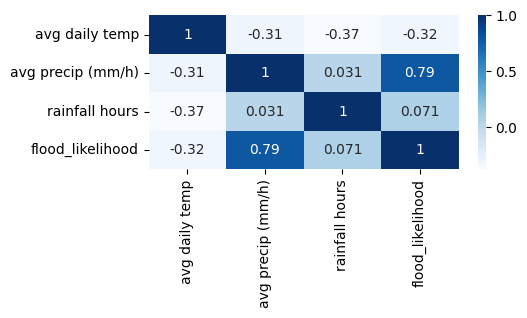

In [14]:
plt.figure(figsize=(5, 2))
corr_matrix2 = data4.corr()
sb.heatmap(corr_matrix2, cmap = "Blues",  annot=True)

In [15]:
corr_matrix2["flood_likelihood"]

avg daily temp      -0.322771
avg precip (mm/h)    0.785903
rainfall hours       0.071319
flood_likelihood     1.000000
Name: flood_likelihood, dtype: float64

By applying Pearson correlation analysis, a significant positive correlation between average precipitation per hour and the likelihood of flooding was discovered. This means that as the average precipitation per hour increases, the probability of flooding also rises.

This finding underscores the importance of monitoring hourly precipitation rates as a key indicator for flood warnings. Understanding this correlation allows for more accurate predictions and helps in developing better preparedness strategies for flood-prone areas in Lagos

## Building the flood prediction model

#### Dividing the data into X(predictors) and Y(target) Variables

In [16]:
X = data4.iloc[:, 0:3].values
X

array([[27.104,  0.   ,  0.   ],
       [27.048,  0.   ,  0.   ],
       [27.272,  0.   ,  0.   ],
       ...,
       [27.72 ,  0.35 , 11.   ],
       [27.608,  0.35 , 11.   ],
       [27.496,  0.91 , 17.   ]])

In [17]:
#Encoding the values in the target column and storing the result in variable Y
from sklearn.preprocessing import LabelEncoder as LE

Y = data4['flood_likelihood']=LE().fit_transform(data4['flood_likelihood'])

#reshaping variable Y
y = Y.reshape(-1, 1)

#### Splitting the data into train and test data

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("Length of train data: ", len(x_train), "Length of test data: ", len(x_test))

Length of train data:  443 Length of test data:  111


#### Importing Logistic Regression model

In [19]:
from sklearn.linear_model import LogisticRegression

##### Training and evaluating the model

In [20]:
# Initialize the logistic regression model
model=LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred) #accuracy score
conf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1]) #confusion matrix

print("Accuracy Score:", round(accuracy * 100, 2))

Accuracy Score: 100.0


##### plotting the confusion matrix, to see how many times the model predicted right or wrong

Text(0.5, 1.0, 'Confusion Matrix')

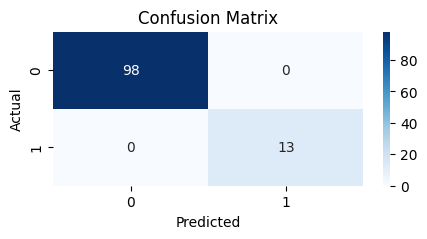

In [21]:
# Set the size of the figure
plt.figure(figsize=(5, 2))
sb.heatmap(conf_matrix, cmap="Blues", annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

## Predicting the likelihood of flood in Lagos for the next two weeks (8 July - 21 July)

In this phase, using the weather forcast data from the site, we are going to predict the likely date of the next flood.

### Importing the data

In [22]:
# Load the data with date parsing
forc_data1 = pd.read_csv("Lagos 2024-07-08 to 2024-08-08.csv")
forc_data1.head(3)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Lagos,08/07/2024,80.5,77.4,79.4,86.9,77.4,81.5,75.3,87.6,...,14.5,7.0,10.0,2024-07-08T06:37:21,2024-07-08T19:05:59,0.08,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"DNMM,remote"
1,Lagos,09/07/2024,79.2,77.1,78.3,79.2,77.1,78.3,72.6,82.6,...,21.7,9.0,10.0,2024-07-09T06:37:34,2024-07-09T19:06:04,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN
2,Lagos,10/07/2024,79.4,76.4,78.1,79.4,76.4,78.1,73.0,84.2,...,20.4,9.0,10.0,2024-07-10T06:37:47,2024-07-10T19:06:08,0.15,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,NaN


### Data Preprocessing

Cleaning and transforming the forecast data like how we did the historical data

In [23]:
#Dropping some columns
forc_data2 = forc_data1.drop(['name', 'tempmax', 'tempmin', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'], axis = 1)

#Renaming columns for better understanding
forc_data2 = forc_data2.rename(columns={
    'datetime': 'date',
    'temp': 'avg daily temp',
    'precip': 'daily precip',
    'precipcover': 'daily precipcover'
})

#standardizing daily precip and avg daily temp columns
# converting the values in the precip column from inches to millimeters
forc_data3 = forc_data2.copy()
forc_data3['daily precip'] = forc_data3['daily precip'] * 25.4

# converting the values in the temp column from degree Fahrenheit (℉) to degree Celsius (℃)
forc_data3['avg daily temp'] = 0.56 * (forc_data3['avg daily temp'] - 32)

#Creating new columns for the prediction model
#Hours of measureable rain (within a 24-hour period)
forc_data3['rainfall hours'] = round(0.24 * forc_data3['daily precipcover'],0)

# Average precip per hour
forc_data3['avg precip (mm/h)'] = round(forc_data3['daily precip']/forc_data3['rainfall hours'], 2)

#finalising data preprocessing
forc_data4 = forc_data3.copy()

#Dropping columns not needed to build the model
forc_data4.drop(['daily precip', 'daily precipcover'], axis =1, inplace=True)

#setting the date column as index for easy visualization
forc_data4.set_index('date', inplace=True)

#rearranging columns
forc_data4 = forc_data4[['avg daily temp', 'avg precip (mm/h)', 'rainfall hours']]
forc_data4.head(3)

,avg daily temp,avg precip (mm/h),rainfall hours
date,,,
08/07/2024,26.544,1.33,17.0
09/07/2024,25.928,0.60,19.0
10/07/2024,25.816,0.43,19.0


### Data Information

In [24]:
forc_data4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 08/07/2024 to nan
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg daily temp     14 non-null     float64
 1   avg precip (mm/h)  14 non-null     float64
 2   rainfall hours     14 non-null     float64
dtypes: float64(3)
memory usage: 1.0+ KB


In [25]:
#Dropping null rows

forc_data4.dropna(inplace=True)
forc_data4

,avg daily temp,avg precip (mm/h),rainfall hours
date,,,
08/07/2024,26.544,1.33,17.0
09/07/2024,25.928,0.60,19.0
10/07/2024,25.816,0.43,19.0
11/07/2024,25.480,0.58,21.0
12/07/2024,25.200,1.15,24.0
13/07/2024,25.928,0.26,11.0
14/07/2024,25.928,0.55,6.0
15/07/2024,25.928,0.13,7.0
16/07/2024,25.704,0.51,8.0


### Getting the X(predictors) variables

In [26]:
predictors= forc_data4.iloc[:,:].values
predictors

array([[26.544,  1.33 , 17.   ],
       [25.928,  0.6  , 19.   ],
       [25.816,  0.43 , 19.   ],
       [25.48 ,  0.58 , 21.   ],
       [25.2  ,  1.15 , 24.   ],
       [25.928,  0.26 , 11.   ],
       [25.928,  0.55 ,  6.   ],
       [25.928,  0.13 ,  7.   ],
       [25.704,  0.51 ,  8.   ],
       [25.648,  0.47 ,  6.   ],
       [25.816,  0.18 ,  4.   ],
       [25.928,  0.1  ,  4.   ],
       [25.816,  0.29 ,  6.   ],
       [25.76 ,  0.14 ,  6.   ]])

### Predicting flood likelihood using the Logistic Regression Flood Prediction model

In [27]:
# Make predictions
future_flood_pred = model.predict(predictors)

future_flood_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Adding the prediction to the data

In [28]:
forc_data4["flood_likelihood"] = future_flood_pred

forc_data4

,avg daily temp,avg precip (mm/h),rainfall hours,flood_likelihood
date,,,,
08/07/2024,26.544,1.33,17.0,0
09/07/2024,25.928,0.60,19.0,0
10/07/2024,25.816,0.43,19.0,0
11/07/2024,25.480,0.58,21.0,0
12/07/2024,25.200,1.15,24.0,1
13/07/2024,25.928,0.26,11.0,0
14/07/2024,25.928,0.55,6.0,0
15/07/2024,25.928,0.13,7.0,0
16/07/2024,25.704,0.51,8.0,0


In [29]:
forc_data4.loc[forc_data4["flood_likelihood"] == 1]

,avg daily temp,avg precip (mm/h),rainfall hours,flood_likelihood
date,,,,
12/07/2024,25.2,1.15,24.0,1


From the prediction, we have that the possible next lagos flood date is 12/07/2014 (12th July, 2024). As earlier said, Under normal circumstances, 1.15 mm of rain per hour, is unlikely to cause significant flooding. However, if the rain is prolonged for hours (in this case 24 hours), there is a possibility of localized flooding, particularly in areas with poor drainage, low-lying regions, or places already experiencing saturated soil conditions.

## Conclusion

This case study highlights the importance of using data-driven approaches to predict and prepare for potential flood events in Lagos.

These findings reinforce the need for robust infrastructure, effective drainage systems, and proactive disaster management strategies to mitigate the impact of such environmental events. Ensuring the safety and resilience of urban areas against flooding requires ongoing efforts and the collaboration of government, communities, and experts in meteorology and urban planning.


Thanks for your time.

A report by Sandra Asagade (https://linktr.ee/sandra_asagade)